In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn import preprocessing

In [3]:
perception = pd.read_csv('PerceptionExperiment.csv')
perception['Error'] = perception['Response'] - perception['TrueValue']
perception.head()

,Test,Display,TestNumber,Trial,Subject,Response,TrueValue,Error
0,"Veritcal Distance, Aligned",1,1,B,1,0.60,0.6,0.00
1,"Veritcal Distance, Aligned",1,1,B,2,0.55,0.6,-0.05
2,"Veritcal Distance, Aligned",1,1,B,3,0.70,0.6,0.10
3,"Veritcal Distance, Aligned",1,1,B,4,0.60,0.6,0.00
4,"Veritcal Distance, Aligned",1,1,B,5,0.65,0.6,0.05


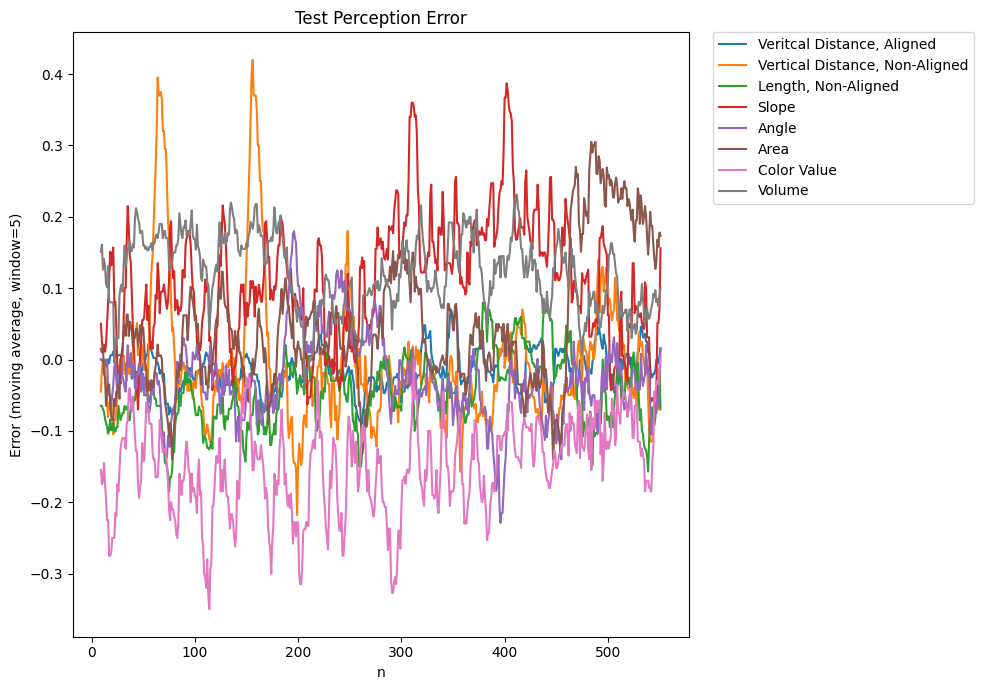

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

for test in perception['Test'].unique():
    error = perception['Error'].loc[perception['Test']==test]
    ax.plot(range(len(error)),error.rolling(window=10).mean(),label=test)

plt.xlabel('n')
plt.ylabel('Error (moving average, window=5)')
plt.title('Test Perception Error')
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

In [19]:
abserror = perception.groupby('Test')['Error'].apply(lambda x: x.abs().mean()).sort_values()
abserror

Test
Veritcal Distance, Aligned        0.045254
Length, Non-Aligned               0.093152
Angle                             0.114674
Vertical Distance, Non-Aligned    0.130435
Area                              0.134149
Volume                            0.150842
Color Value                       0.202011
Slope                             0.215018
Name: Error, dtype: float64

In [37]:
abserror.index

Index(['Veritcal Distance, Aligned', 'Length, Non-Aligned', 'Angle',
       'Vertical Distance, Non-Aligned', 'Area', 'Volume', 'Color Value',
       'Slope'],
      dtype='object', name='Test')

In [40]:
ylabels = [s.replace(',', '\n') for s in abserror.index]
ylabels

['Veritcal Distance\n Aligned',
 'Length\n Non-Aligned',
 'Angle',
 'Vertical Distance\n Non-Aligned',
 'Area',
 'Volume',
 'Color Value',
 'Slope']

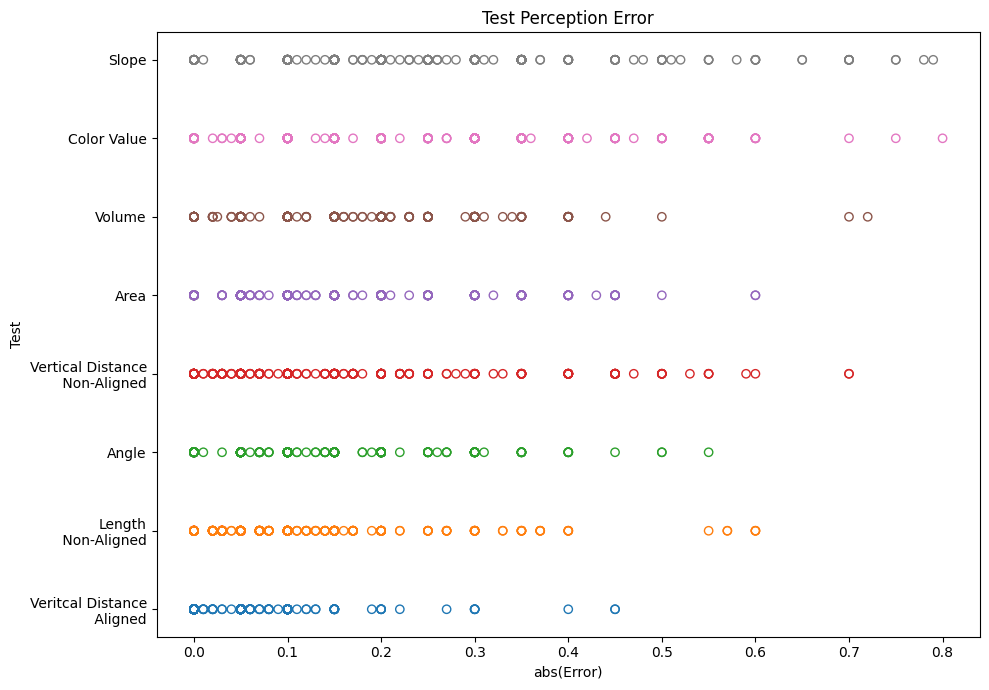

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

y = 0
for test in abserror.index:
    error = abs(perception['Error'].loc[perception['Test']==test])
    ax.scatter(error,list(y for x in error),facecolors='none',edgecolors=list(mcolors.TABLEAU_COLORS.keys())[y])
    y += 1

plt.xlabel('abs(Error)')
plt.ylabel('Test')
plt.yticks(ticks=range(len(ylabels)),labels=ylabels)
plt.title('Test Perception Error')
plt.tight_layout()
plt.show()

In [31]:
list(mcolors.TABLEAU_COLORS.keys())[0]

'tab:blue'

In [43]:
subjects = perception.loc[(perception['Subject'] >= 56) & (perception['Subject'] <= 73)]
subjects

,Test,Display,TestNumber,Trial,Subject,Response,TrueValue,Error
55,"Veritcal Distance, Aligned",1,1,B,56,0.66,0.6,0.06
56,"Veritcal Distance, Aligned",1,1,B,57,0.60,0.6,0.00
57,"Veritcal Distance, Aligned",1,1,B,58,0.55,0.6,-0.05
58,"Veritcal Distance, Aligned",1,1,B,59,0.60,0.6,0.00
59,"Veritcal Distance, Aligned",1,1,B,60,0.60,0.6,0.00
...,...,...,...,...,...,...,...,...
4392,Volume,2,16,D,69,0.75,0.7,0.05
4393,Volume,2,16,D,70,0.80,0.7,0.10
4394,Volume,2,16,D,71,0.90,0.7,0.20
4395,Volume,2,16,D,72,0.75,0.7,0.05


In [80]:
suberror1 = perception.loc[perception['Display']==1].groupby('Test')['Error'].mean().sort_values(ascending=False)
suberror1

Test
Volume                            0.127138
Slope                             0.073659
Area                              0.010761
Vertical Distance, Non-Aligned    0.009457
Angle                            -0.004094
Veritcal Distance, Aligned       -0.021920
Length, Non-Aligned              -0.065580
Color Value                      -0.167862
Name: Error, dtype: float64

In [81]:
suberror2 = perception.loc[perception['Display']==2].groupby('Test')['Error'].mean()
suberror2

Test
Angle                            -0.047862
Area                              0.088406
Color Value                      -0.131377
Length, Non-Aligned              -0.029493
Slope                             0.147609
Veritcal Distance, Aligned       -0.004457
Vertical Distance, Non-Aligned   -0.022717
Volume                            0.115562
Name: Error, dtype: float64

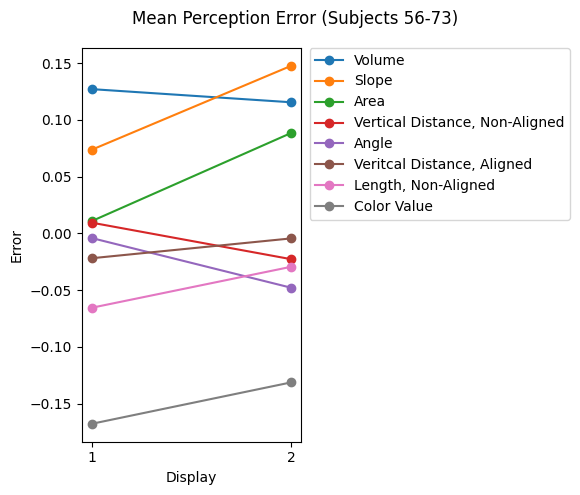

In [96]:
fig, ax = plt.subplots(1,1, figsize=(6,5))

suberror = {}
err = 0
for test in suberror1.index:
    suberror[test] = (suberror1[test],suberror2[test])
    ax.plot(range(len(suberror[test])),suberror[test],marker='o',label=test)
    err += 1

plt.xlabel('Display')
plt.xticks(ticks=[0,1], labels=[1,2])
plt.ylabel('Error')
# plt.yticks(ticks=range(len(ylabels)),labels=ylabels)
fig.suptitle('Mean Perception Error (Subjects 56-73)')
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

In [83]:
suberror1['Angle']

-0.004094202898550743

In [123]:
vertnonaligned = perception.loc[(perception['Test']=='Vertical Distance, Non-Aligned')&(perception['Display']==1)]
vertnonalignedB = vertnonaligned.loc[vertnonaligned['Trial']=='B'].reset_index()
vertnonalignedC = vertnonaligned.loc[vertnonaligned['Trial']=='C'].reset_index()
vertnonalignedD = vertnonaligned.loc[vertnonaligned['Trial']=='D'].reset_index()

In [124]:
print(vertnonalignedB.shape)
print(vertnonalignedC.shape)
print(vertnonalignedD.shape)

(92, 9)
(92, 9)
(92, 9)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


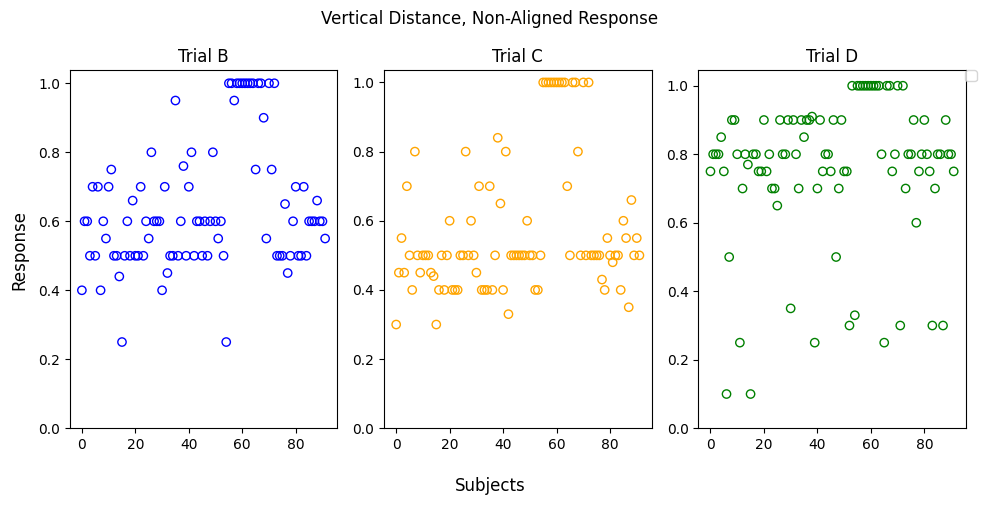

In [128]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

suberror = {}
err = 0
ax[0].scatter(range(len(vertnonalignedB)),vertnonalignedB['Response'],facecolors='none',edgecolors='blue')
ax[1].scatter(range(len(vertnonalignedC)),vertnonalignedC['Response'],facecolors='none',edgecolors='orange')
ax[2].scatter(range(len(vertnonalignedD)),vertnonalignedD['Response'],facecolors='none',edgecolors='green')

ax[0].set_title('Trial B')
ax[1].set_title('Trial C')
ax[2].set_title('Trial D')

ax[0].set_yticks([0,0.2,0.4,0.6,0.8,1])
ax[1].set_yticks([0,0.2,0.4,0.6,0.8,1])
ax[2].set_yticks([0,0.2,0.4,0.6,0.8,1])

fig.supxlabel('Subjects')
fig.supylabel('Response')
fig.suptitle('Vertical Distance, Non-Aligned Response')
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.tight_layout()
plt.show()

In [3]:
airq = pd.read_csv('AirQuality.csv')
airq.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


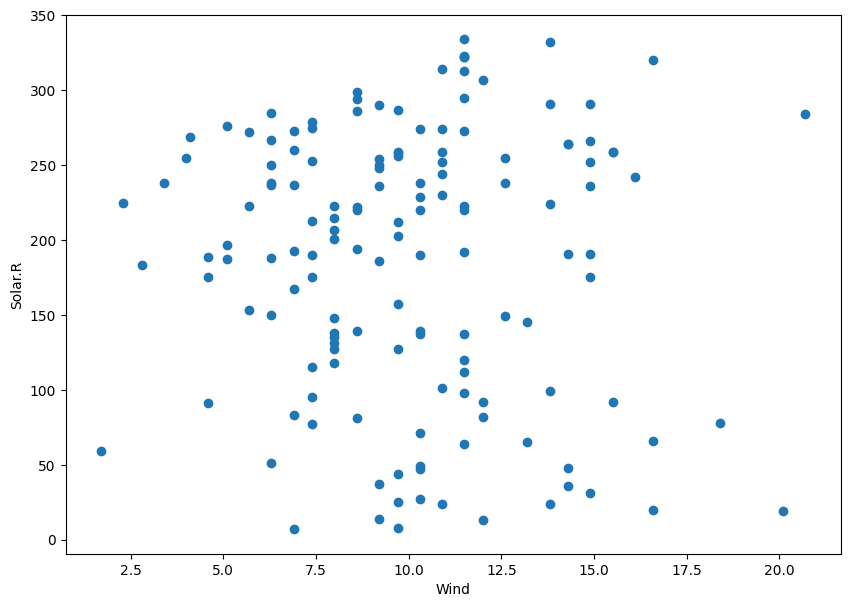

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

ax.scatter(airq['Wind'],airq['Solar.R'])

plt.xlabel('Wind')
plt.ylabel('Solar.R')
plt.show()

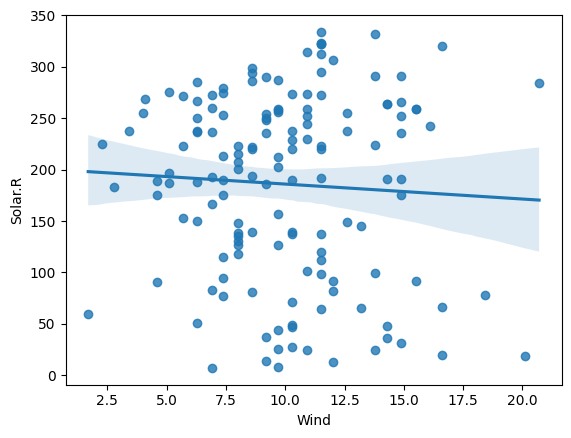

In [8]:
ax = sns.regplot(data=airq, x="Wind", y="Solar.R")

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(airq)
airq_norm = min_max_scaler.fit_transform(airq)

In [12]:
airq_norm[:5]

array([[0.23952096, 0.55963303, 0.3       , 0.26829268, 0.        ,
        0.        ],
       [0.20958084, 0.33944954, 0.33157895, 0.3902439 , 0.        ,
        0.03333333],
       [0.06586826, 0.43425076, 0.57368421, 0.43902439, 0.        ,
        0.06666667],
       [0.10179641, 0.93577982, 0.51578947, 0.14634146, 0.        ,
        0.1       ],
       [       nan,        nan, 0.66315789, 0.        , 0.        ,
        0.13333333]])

In [13]:
airq_minmax = pd.DataFrame(airq_norm, columns=airq.columns)
airq_minmax.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.239521,0.559633,0.300000,0.268293,0.0,0.000000
1,0.209581,0.339450,0.331579,0.390244,0.0,0.033333
2,0.065868,0.434251,0.573684,0.439024,0.0,0.066667
3,0.101796,0.935780,0.515789,0.146341,0.0,0.100000
4,NaN,NaN,0.663158,0.000000,0.0,0.133333


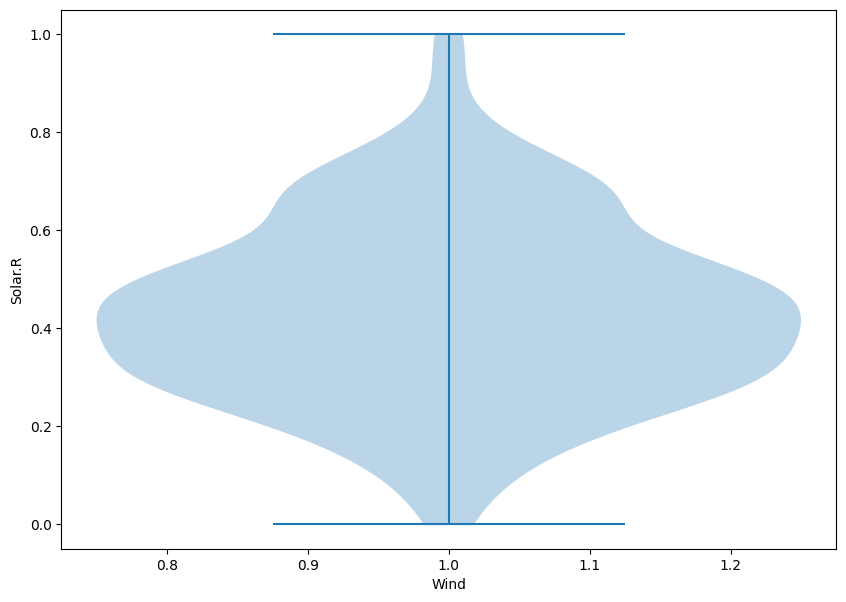

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

ax.violinplot(airq_minmax['Wind'])

plt.xlabel('Wind')
plt.ylabel('Solar.R')
plt.show()

<Axes: xlabel='Wind'>

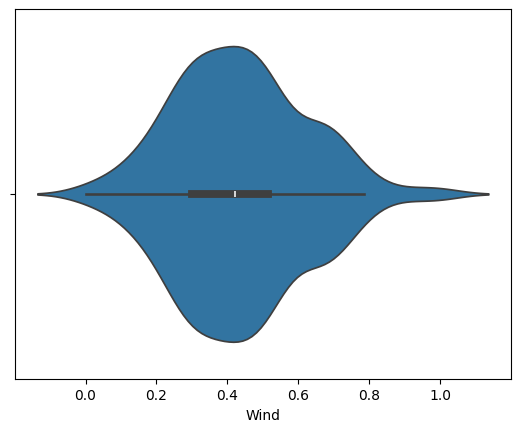

In [16]:

sns.violinplot(x="Wind", data=airq_minmax)

In [22]:
windsolar = airq_minmax[['Wind','Solar.R']]
windsolar.describe()

,Wind,Solar.R
count,153.000000,146.000000
mean,0.434606,0.547191
std,0.185421,0.275408
min,0.000000,0.000000
25%,0.300000,0.332569
50%,0.421053,0.605505
75%,0.515789,0.769878
max,1.000000,1.000000


[Text(0.5, 1.0, 'Wind and Solar.R Distributions')]

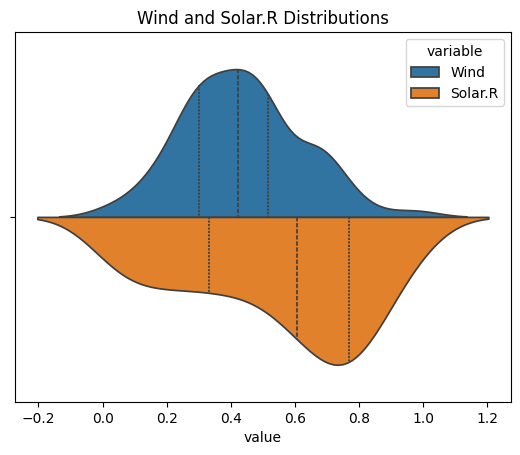

In [26]:
df2 = windsolar.melt()

sns.violinplot(data=df2, x='value', 
               hue='variable', split=True, inner='quart').set(
                   title='Wind and Solar.R Distributions'
               )

In [25]:
df2.head()

,variable,value
0,Wind,0.300000
1,Wind,0.331579
2,Wind,0.573684
3,Wind,0.515789
4,Wind,0.663158


In [27]:
def zscorenorm(data):
    return (data - data.mean()) / data.std()

In [31]:
df3 = airq[['Wind','Solar.R']]
df3['Wind'] = (df3['Wind'] - df3['Wind'].mean())/ df3['Wind'].std()
df3['Solar.R'] = zscorenorm(df3['Solar.R'])
df3.head()

C:\Users\ianmu\AppData\Local\Temp\ipykernel_24340\4109976636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Wind'] = (df3['Wind'] - df3['Wind'].mean())/ df3['Wind'].std()
C:\Users\ianmu\AppData\Local\Temp\ipykernel_24340\4109976636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Solar.R'] = zscorenorm(df3['Solar.R'])


,Wind,Solar.R
0,-0.725948,0.045176
1,-0.555639,-0.754305
2,0.750066,-0.410084
3,0.437832,1.410956
4,1.232609,NaN


[Text(0.5, 1.0, 'Wind and Solar.R Distributions')]

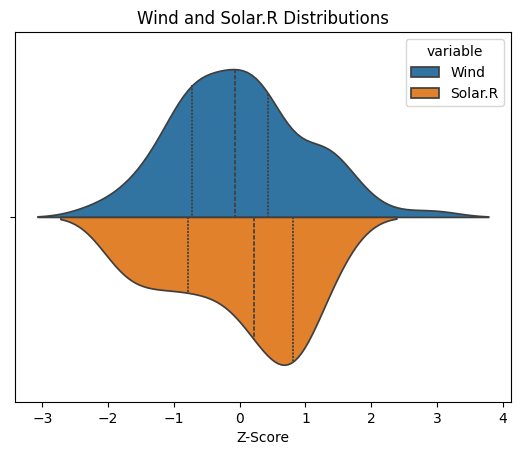

In [46]:
df4 = df3.melt()
df4.rename(columns={'value':'Z-Score'},inplace=True)

sns.violinplot(data=df4, x='Z-Score', 
               hue='variable', split=True, inner='quart').set(
                   title='Wind and Solar.R Distributions'
               )

In [39]:
airqmelt = airq.melt()
airqmelt.head()

,variable,value
0,Ozone,41.0
1,Ozone,36.0
2,Ozone,12.0
3,Ozone,18.0
4,Ozone,NaN


[Text(0.5, 1.0, 'Air Quality Variable Distributions')]

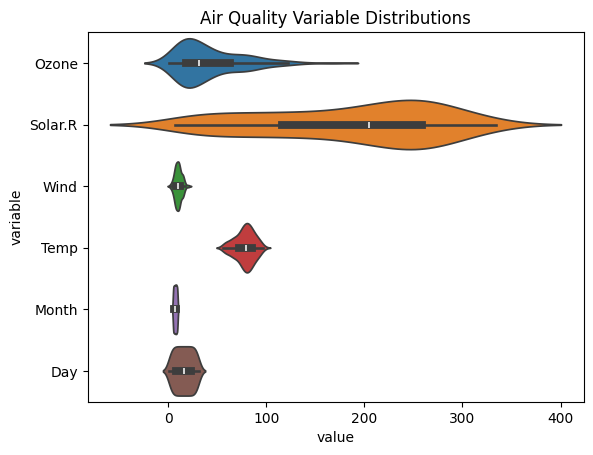

In [52]:
sns.violinplot(x="value",y='variable', data=airqmelt, hue='variable').set(
                   title='Air Quality Variable Distributions'
               )

In [41]:
airq_zscores = airq.copy()

In [42]:
for col in airq_zscores:
    airq_zscores[col] = zscorenorm(airq_zscores[col])

In [43]:
airq_zscores.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,-0.034234,0.045176,-0.725948,-1.149714,-1.407294,-1.670019
1,-0.185805,-0.754305,-0.555639,-0.621467,-1.407294,-1.557210
2,-0.913345,-0.410084,0.750066,-0.410168,-1.407294,-1.444401
3,-0.731460,1.410956,0.437832,-1.677961,-1.407294,-1.331592
4,NaN,NaN,1.232609,-2.311857,-1.407294,-1.218782


[Text(0.5, 1.0, 'Air Quality Variable Distributions')]

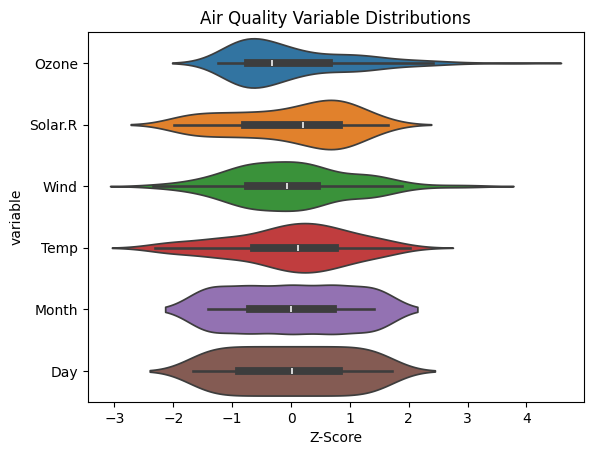

In [ ]:
airq_zmelt = airq_zscores.melt()
airq_zmelt.rename(columns={'value':'Z-Score'},inplace=True)
sns.violinplot(x="Z-Score",y='variable', data=airq_zmelt,hue='variable').set(
                   title='Air Quality Variable Distributions'
               )

In [53]:
wind_sorted = np.sort(airq['Wind'])
solar_sorted = np.sort(airq['Solar.R'])

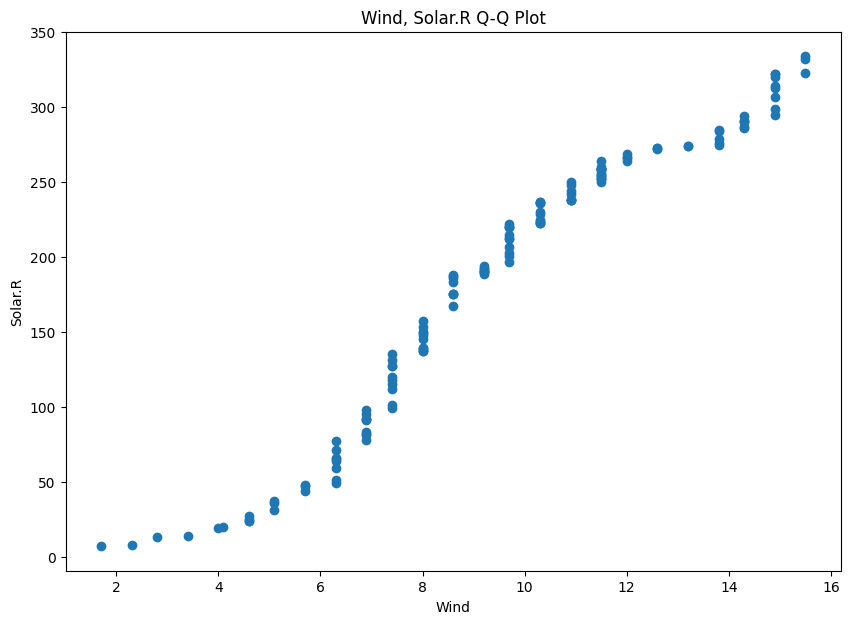

In [55]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

ax.scatter(wind_sorted,solar_sorted)

plt.xlabel('Wind')
plt.ylabel('Solar.R')
plt.title('Wind, Solar.R Q-Q Plot')
plt.show()